# Machine Learning Programming Exercise 7: K-Means Clustering

In [1]:
#import package(s)
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio 

## 1 K-means Clustering
In this part exercise, the K-means algorithm will be used for image compression. An example 2D dataset is used to gain an intuition of how the K-means algorithm works. The K-means algorithm compresses the image by reducing the number of colors that occur in an image to only those that are most common in that image.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    The K-means algorithm is by far the most widely used clustering algorithm. It is an unsupervised learning algorithm where it is given an unlabeled training set and then finds some structure in the data.
</div>

### 1.1 Implementing K-means
The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, a training set $\{ x^{(1)}, \dots, x^{(m)} \}$ (where $x^{(i)} \in \mathbb{R}^n$) are grouped into a few cohesive "clusters". The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then reﬁnes this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments. 

The K-means algorithm is as follows:
1. Randomly initialize K cluster centroids $\mu_1, \mu_2, \dots, \mu_k \in \mathbb{R}^n$.

For iteration $= 1$ to $n$ {
2. Cluster assignment step: For $i = 1$ to $m$,
$c^{(i)} := $ index from ($1$ to $K$) of cluster centroid closest to $x^{(i)}$. 

3. Move centroid step: For $k = 1$ to $K$,
$\mu_k := $ average mean of points assigned to cluster $k$. 

}

The inner-loop of the algorithm repeatedly carries out two steps: (i) Assigning each training example $x^{(i)}$ to its closest centroid, and (ii) Recomputing the mean of each centroid using the points assigned to it. The K-means algorithm will always converge to some ﬁnal set of means for the centroids. Note that the converged solution may not always be ideal and depends on the initial setting of the centroids. Therefore, in practice the K-means algorithm is usually run a few times with diﬀerent random initializations. One way to choose between these diﬀerent solutions from diﬀerent random initializations is to choose the one with the lowest cost function value (distortion).

<div class="alert alert-block alert-info">
<b>Note:</b> 
    The optimization objective is given by 
    $\begin{align*} \min_{c^{(1)}, \dots, c^{(m)} \\ \mu_1, \dots, \mu_K} J(c^{(1)}, \dots, c^{(m)}, \mu_1, \dots, \mu_K) = \min_{c^{(1)}, \dots, c^{(m)} \\ \mu_1, \dots, \mu_K} \frac{1}{m} \sum_{i=1}^m  \|x^{(i)} - \mu_{c^{(i)}} \|^2 .\end{align*}$
    
   Mathematically, the cost function or the distortion function $J$ is minimized in the cluster assignment step.

</div>

#### 1.1.1 Finding closest centroids
In the "cluster assignment" phase of the K-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Speciﬁcally, for every example $i$, 
$ \begin{align*} c^{(i)} := j \text{ that minimizes } \|x^{(i)} - \mu_j \|^2 ,\end{align*}$
where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ and $\mu_j$ is the position (value) of the $j$th centroid. Note that $c^{(i)}$ corresponds to $idx(i)$ in the code.

The function findClosestCentroids takes the data matrix $X$ and the locations of all $centroids$ inside centroids and should output a one-dimensional array $idx$ that holds the index (a value in $\{1,...,K\}$, where $K$ is total number of centroids) of the closest centroid to every training example. It uses a loop over every training example and every centroid.

Run the code to see the output [1 3 2] corresponding to the centroid assignments for the ﬁrst $3$ examples.

In [2]:
#define function for exercise(s)
def findClosestCentroids(X, centroids):
#FINDCLOSESTCENTROIDS computes the centroid memberships for every example
#   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
#   in idx for a dataset X where each row is a single example. idx = m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])

#Set K
    K = centroids.shape[0]

#You need to return the following variables correctly.
    m = X.shape[0]
    idx = np.zeros((m, 1))
    
    for i in range(m):
        c = np.zeros((K, 1))
        for j in range(K):
            dist = np.linalg.norm(X[i]-centroids[j])
            c[j]=dist
        idx[i] = np.argmin(c)+1

    return idx

# ================= Part 1: Find Closest Centroids ====================
#  To help you implement K-Means, we have divided the learning algorithm 
#  into two functions -- findClosestCentroids and computeCentroids. In this
#  part, you should complete the code in the findClosestCentroids function. 

print('Finding closest centroids\n')

#Load an example dataset that we will be using
data = sio.loadmat('ex7data2.mat')
X = data['X']

#Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

#Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: ', idx[0:3])
print('the closest centroids should be 1, 3, 2 respectively)\n')

Finding closest centroids

Closest centroids for the first 3 examples:  [[1.]
 [3.]
 [2.]]
the closest centroids should be 1, 3, 2 respectively)



#### 1.1.2 Computing centroid means
Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Speciﬁcally, for every centroid $k$, 
$\begin{align*} \mu_k := \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)} \end{align*}$
where $C_k$ is the set of examples that are assigned to centroid $k$. Concretely, if two examples, say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then update $\mu_2$ using $\mu_2 = \frac{1}{2} (x^{(3)} + x^{(5)})$.

Here, each cluster centroid is moved to average of the location of the points assigned to it. This process repeats iteratively until Kmeans converged, that is when the cluster centroids and the assigned points no longer changes. 

The code for computeCentroid should use a loop over the centroids and over the examples. Having a vectorized implementation that does not use such a loop may make the code run faster.

In [3]:
#define function for exercise(s)
def computeCentroids(X, idx, K):
#COMPUTECENTROIDS returns the new centroids by computing the means of the 
#data points assigned to each centroid.
#   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
#   computing the means of the data points assigned to each centroid. It is
#   given a dataset X where each row is a single data point, a vector
#   idx of centroid assignments (i.e. each entry in range [1..K]) for each
#   example, and K, the number of centroids. You should return a matrix
#   centroids, where each row of centroids is the mean of the data points
#   assigned to it.

    #Useful variables
    m,n = X.shape
    
    #You need to return the following variables correctly.
    centroids = np.zeros((K, n))
    
    for i in range(1,K+1):
        centroids[i-1,:] = np.mean(X[np.where(idx==i)[0],:],axis=0)
    
    return centroids

# ===================== Part 2: Compute Means =========================
#  After implementing the closest centroids function, you should now
#  complete the computeCentroids function.

print('\nComputing centroids means.\n\n')

#Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids: \n')
print(centroids)
print('\n(the centroids should be\n')
print('   [ 2.428301 3.157924 ]\n')
print('   [ 5.813503 2.633656 ]\n')
print('   [ 7.119387 3.616684 ]\n\n')


Computing centroids means.


Centroids computed after initial finding of closest centroids: 

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

(the centroids should be

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]




### 1.2 K-means on example dataset
Run the K-means algorithm on a toy 2D dataset to understand how K-means works. The K-means code will produce a visualization that steps through the progress of the algorithm at each iteration. Press enter multiple times to see how each step of the K-means algorithm changes the centroids and cluster assignments. At the end, the figure should look as the one displayed in Figure 1.

Image Source: ex7.pdf from Andrew Ng's Coursera course in Machine Learning
![kmeans.png](kmeans.png)


Running K-Means clustering on example dataset.

K-Means iteration 1/10...



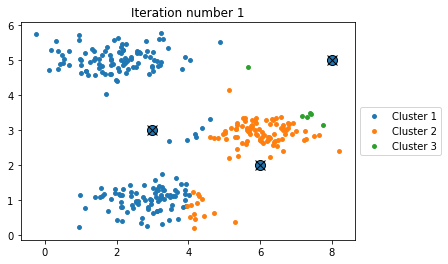

Press enter to continue
K-Means iteration 2/10...



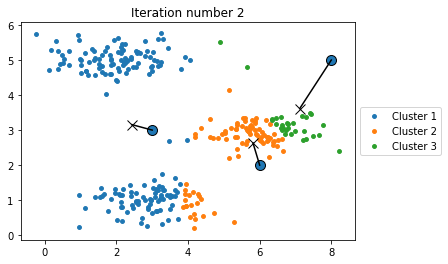

Press enter to continue
K-Means iteration 3/10...



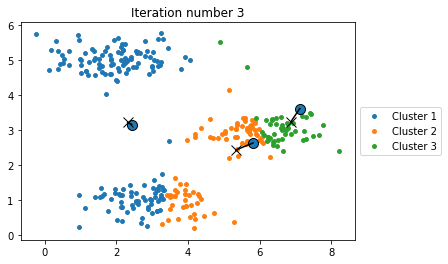

Press enter to continue
K-Means iteration 4/10...



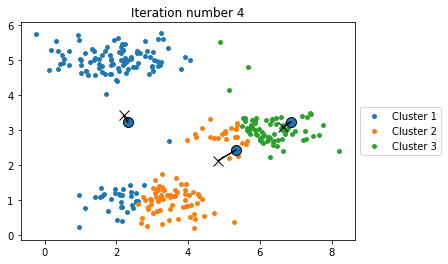

Press enter to continue
K-Means iteration 5/10...



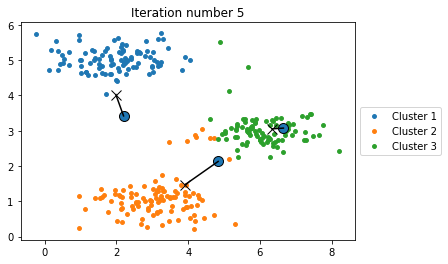

Press enter to continue
K-Means iteration 6/10...



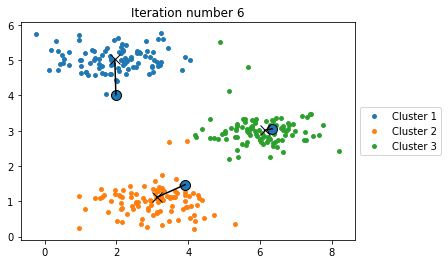

Press enter to continue
K-Means iteration 7/10...



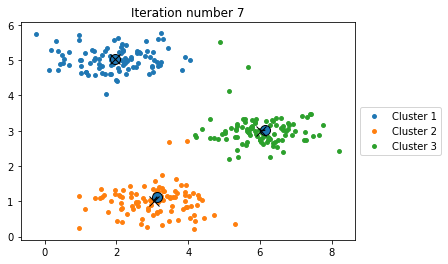

Press enter to continue
K-Means iteration 8/10...



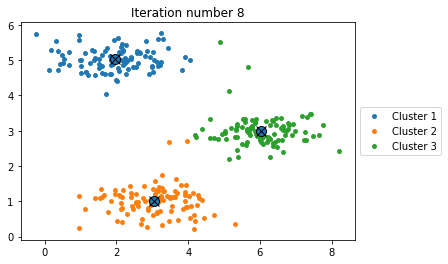

Press enter to continue
K-Means iteration 9/10...



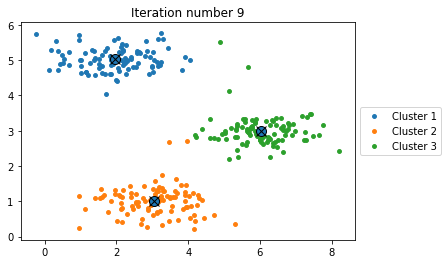

Press enter to continue
K-Means iteration 10/10...



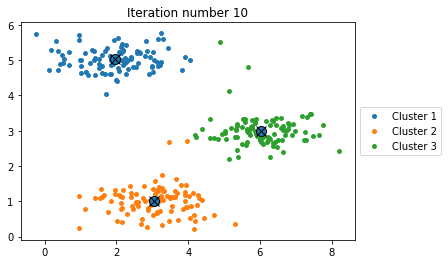

Press enter to continue
K-Means Done.




In [4]:
#define function for exercise(s)
def plotDataPoints(X, idx, K):
#PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
#index assignments in idx have the same color
#   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
#   with the same index assignments in idx have the same color
    
    #Plot the data
    plt.figure()
    for i in range(1,K+1):
        #label cluster
        clus_lab = "Cluster " + str(i)
        #scatter plot
        plt.scatter((X[np.where(idx == i)[0],:])[:,0], (X[np.where(idx == i)[0],:])[:,1], 
                    s=15, label=clus_lab)
        
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    
def drawLine(p1, p2, **kwargs):
#DRAWLINE Draws a line from point p1 to point p2
#   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
#   current figure
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]], **kwargs)

def plotProgresskMeans(X, centroids, previous, idx, K, i):
#PLOTPROGRESSKMEANS is a helper function that displays the progress of 
#k-Means as it is running. It is intended for use only with 2D data.
#   PLOTPROGRESSKMEANS(X, centroids, previous, idx, K, i) plots the data
#   points with colors assigned to each centroid. With the previous
#   centroids, it also plots a line between the previous locations and
#   current locations of the centroids.
    
    #Plot the examples
    plotDataPoints(X, idx, K)

    #Plot the new centroids as black x's
    plt.plot(previous[:,0], previous[:,1], 'o', markeredgecolor='k', 
             markersize=10, linewidth=3.0)
    plt.plot(centroids[:,0], centroids[:,1], 'x', markeredgecolor='k', 
             markersize=10, linewidth=3.0)
    
    #Plot the history of the centroids with lines
    for j in range(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :], color = 'black', linestyle ='-')
    
    #Title
    plt.title('Iteration number %s' % i)
    
    
def runkMeans(X, initial_centroids, max_iters, plot_progress):
#RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
#is a single example
#   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
#   plot_progress) runs the K-Means algorithm on data matrix X, where each 
#   row of X is a single example. It uses initial_centroids used as the
#   initial centroids. max_iters specifies the total number of interactions 
#   of K-Means to execute. plot_progress is a true/false flag that 
#   indicates if the function should also plot its progress as the 
#   learning happens. This is set to false by default. runkMeans returns 
#   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])

    #Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    
    #Run K-Means
    for i in range(1,max_iters+1):
        
        #Output progress
        print('K-Means iteration %d/%d...\n' % (i, max_iters))

        #For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
        
        #Optionally, plot progress here
        if plot_progress == True:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            plt.show()
            input("Press enter to continue")
        
        #Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
    
    return centroids, idx

# =================== Part 3: K-Means Clustering ======================
#  After you have completed the two functions computeCentroids and
#  findClosestCentroids, you have all the necessary pieces to run the
#  kMeans algorithm. In this part, you will run the K-Means algorithm on
#  the example dataset we have provided. 

print('\nRunning K-Means clustering on example dataset.\n')
#Settings for running K-Means
K = 3
max_iters = 10

#For consistency, here we set centroids to specific values
#but in practice you want to generate them automatically, such as by
#settings them to be random examples (as can be seen in
#kMeansInitCentroids).

centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

#Run K-Means algorithm. The 'true' at the end tells our function to plot
#the progress of K-Means

print('K-Means Done.\n\n')

### 1.3 Random initialization
The initial assignments of centroids for the example dataset were designed to see the same ﬁgure as in Figure 1. In practice, a good strategy for initializing the centroids is to select random examples from the training set.

The code for kMeansInitCentroids randomly permutes the indices of the examples (using numpy.random.permutation). Then, it selects the ﬁrst $K$ examples based on the random permutation of the indices. This allows the examples to be selected at random without the risk of selecting the same example twice.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    For clusters smaller than 10, multiple random intializations can increase the chances of K-means of finding the best possible clustering. Here, K-means is intialized and ran multiple times to make sure a good local or global optima is obtained.
    
 For $K$ larger than 10, multiple random initializations is less likely to make a huge diﬀerence and there is a much higher chance that the first random initialization will give a pretty decent solution already.
</div>

In [5]:
#define function for exercise(s)
def kMeansInitCentroids(X, K):
#KMEANSINITCENTROIDS This function initializes K centroids that are to be 
#used in K-Means on the dataset X
#   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
#   used with the K-Means on the dataset X

    #Initialize the centroids to be random examples
    #Randomly reorder the indices of examples
    randidx = np.random.permutation(range(X.shape[0]))
    #Take the first K examples as centroids
    centroids = X[randidx[0:K]]
    
    return centroids

# ============= Part 4: K-Means Clustering on Pixels ===============
#  In this exercise, you will use K-Means to compress an image. To do this,
#  you will first run K-Means on the colors of the pixels in the image and
#  then you will map each pixel onto its closest centroid.  

#  You should now complete the code in kMeansInitCentroids.m
 
print('Running K-Means clustering on pixels from an image.')

#Load an image of a bird
#A = plt.imread('bird_small.png')
#The original 128x128 image.
#plt.imshow(A)

#If imread does not work for you, you can try instead
img_data = sio.loadmat('bird_small.mat')
A = img_data['A'] 
A = A / float(255) #Divide by 255 so that all values are in the range 0 - 1

#Size of the image
A.shape

#Reshape the image into an Nx3 matrix where N = number of pixels.
#Each row will contain the Red, Green and Blue pixel values
#This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape((A.shape[0] * A.shape[1], A.shape[2]))

#Run your K-Means algorithm on this data
#You should try different values of K and max_iters here
K = 16
max_iters = 10

#When using K-Means, it is important the initialize the centroids
#randomly. 
#You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K)

#Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, False)

Running K-Means clustering on pixels from an image.
K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...

K-Means iteration 10/10...



### 1.4 Image compression with K-means
In this exercise, K-means is applied to image compression. The provided photo used in this exercise belongs to Frank Wouters and is used with his permission. In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from $0$ to $255$) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding. The image contains thousands of colors, and in this part of the exercise, he number of colors will be reduced to 16 colors. 

By making this reduction, it is possible to represent (compress) the photo in an efficient way. Speciﬁcally, only the RGB values of the 16 selected colors are stored, and for each pixel in the image only the index of the color at that location are stored (where only 4 bits are necessary to represent 16 possibilities). 

In this exercise, the K-means algorithm selects the 16 colors that will be used to represent the compressed image. Concretely, every pixel in the original image is treated as a data example and the K-means algorithm finds the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space. Once the cluster centroids are computed on the image, then the 16 colors are used to replace the pixels in the original image.

#### 1.4.1 K-means on pixels
The code that reads in the image, creates a three-dimensional matrix $A$ whose first two indices identify a pixel position and whose last index represents red, green, or blue. For example, $A(50, 33, 3)$ gives the blue intensity of the pixel at row $50$ and column $33$.

After the image is loaded, it is reshaped to an $m\times3$ matrix of pixel colors (where $m = 16384 = 128\times128$), and the K-means function is called.

After finding the top $K = 16$ colors to represent the image, each pixel position is assigned to its closest centroid using the findClosestCentroids function. This allows the original image to be represented using the centroid assignments of each pixel. Notice that the number of bits required to describe the image are significantly reduced. The original image required $24$ bits for each one of the $128\times128$ pixel locations, resulting in total size of $128\times128\times24 = 393,216$ bits. The new representation requires some overhead storage in form of a dictionary of $16$ colors, each of which require $24$ bits, but the image itself then only requires $4$ bits per pixel location. The final number of bits used is therefore $16\times24 + 128\times128\times24 = 65,920$ bits, which corresponds to compressing the original image by about a factor of $6$.

Applying K-Means to compress an image.



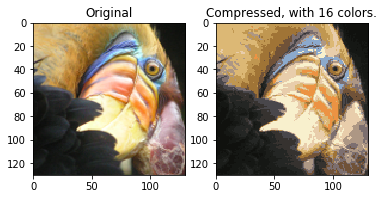

In [6]:
# ================= Part 5: Image Compression ======================
#  In this part of the exercise, you will use the clusters of K-Means to
#  compress an image. To do this, we first find the closest clusters for
#  each example. 

print('Applying K-Means to compress an image.\n')

#Find closest cluster members
idx = findClosestCentroids(X, centroids)

#Essentially, now we have represented the image X as in terms of the
#indices in idx. 

#We can now recover the image from the indices (idx) by mapping each pixel
#(specified by its index in idx) to the centroid value
X_recovered = centroids[(idx-1).astype(int)]

#Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape((A.shape[0],A.shape[1], A.shape[2]))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,10))
#Display the original image 
ax1.imshow(A, extent=[0,130,130,0])
ax1.set_title('Original')
#Display compressed image side by side
ax2.imshow(X_recovered, extent=[0,130,130,0])
ax2.set_title('Compressed, with %d colors.' % K)
plt.show()

The effects of the compression by reconstructing the image based only on the centroid assignments can be viewed. Specifically, each pixel location can be replaced with the mean of the centroid assigned to it. Even though the resulting image retains most of the characteristics of the original, there are some compression artifacts.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    Despite that the value of $K$ was already chosen for these exercise, picking its values is no easy task. The most common way of choosing the number of clusters $K$ is manually either by looking at visualizations or the output of the clustering algorithm or something else, or by hand.
    
   Another method used is called the elbow method, but it is not used that often because it can produce an ambiguous curve that makes it harder to choose the number of clusters.
   
   A better way to choose $K$ based on the purpose are you running K-means. Ex: for a T-shirt business, $K$ can represent the T-shirts sizes. Having more clusters means having more T-shirt sizes that could fit the customers better. Having less clusters means having fewer T-shirt sizes that can be sold more cheaply to the customers.

</div>

### 1.5 Optional (ungraded) exercise: Use your own image

In this exercise, modify the code to run on one of your own images. Note that if your image is very large, then K-means can take a long time to run. Therefore, we recommend that you resize your images to managable sizes before running the code. You can also try to vary $K$ to see the effects on the compression.